In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
nlp = spacy.load('./data/embeddings_disc/')

In [2]:
categoria = 'religion'

In [3]:
lectura = '../datos/entrenamiento_modelos_categorias/tweets_entrenamiento_' + categoria + '_balance.csv'
data = pd.read_csv(lectura)

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,full_text,categoria_1-ap,categoria_2-dis,categoria_3-ed,categoria_4-gen,categoria_5-id,categoria_6-or,label
0,335765,337005,pobrecita mojigata jajajaja sabemos puta,0,0,0,0,0,0,1
1,335766,337007,acabo ver q queda llevaba bolsas vaina ocurrio...,0,0,0,0,0,0,1
2,335767,337008,caminando rapidisimo aqui lleve delante muleta...,0,0,0,0,0,0,1
3,335768,337009,internet lleno imagenes porno vieja simplement...,0,0,0,0,0,0,1
4,335769,337010,dedo algun hacer,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6807,5104,106568,puta webaaaaa sigan amlovers endiosados cuanto...,0,0,0,1,0,0,0
6808,5105,293383,nunca cuenta cae puto whatsapp,0,0,0,0,0,1,0
6809,5106,728175,siempre estar[],0,0,0,0,0,0,0
6810,5107,223992,pasado cambioporque aguita tener medicamento m...,0,0,0,0,1,0,0


In [5]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [6]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(1363, 300)

In [7]:
import pickle as pickle

carga_modelo = '../modelos/modelo_capa2_' + categoria +'.p'
pickleFile = open(carga_modelo, 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

In [8]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['label']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"] 

In [9]:
y_prob = best_model.predict(npEmbeddings2)
confusion_matrix(y_true, y_prob)

array([[925, 114],
       [190, 134]])

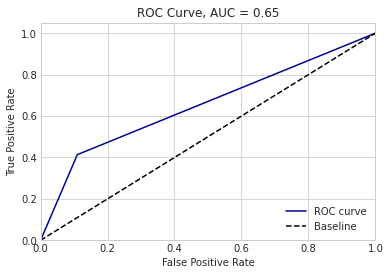

In [10]:
#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [11]:
metrics.f1_score(y_true, y_prob)

0.4685314685314685

In [12]:
metrics.recall_score(y_true, y_prob)

0.41358024691358025